In [1]:
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
def convolution(A,B):       
    lengthA = np.size(A)
    lengthB = np.size(B)
    C =np.zeros(lengthA+lengthB-1)        
    for m in np.arange(lengthA):   
        for n in np.arange(lengthB):        
            C[m+n] = C[m+n] + A[m]*B[n]                          
    return C

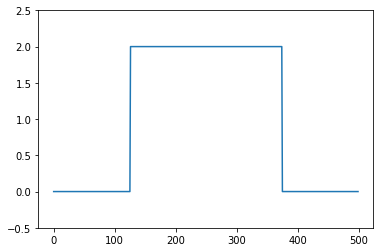

In [3]:
t = np.linspace(0.15, 0.35, 500, endpoint=False)
plt.plot(signal.square(2 * np.pi * 5 * t)+1)
plt.ylim(-0.5, 2.5)
sig1 = signal.square(2 * np.pi * 5 * t)+1

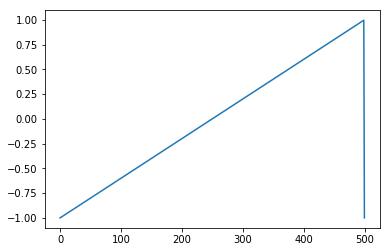

In [4]:
t = np.linspace(0, 0.2, 500)
plt.plot(signal.sawtooth(2 * np.pi * 5 * t))
sig2 = signal.sawtooth(2 * np.pi * 5 * t)

In [5]:
out = convolution(sig1,sig2)

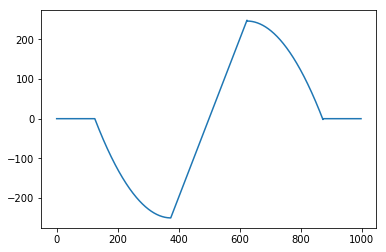

In [13]:
plt.plot(out)

In [25]:
out.shape

(999,)

In [8]:
sig2.shape

(500,)

In [9]:
sig1_z = np.concatenate((np.zeros(250),sig1,np.zeros(250)))

In [10]:
sig1_z.shape

(1000,)

In [11]:
out_z = convolution(sig1_z,np.flip(sig2,axis=0))

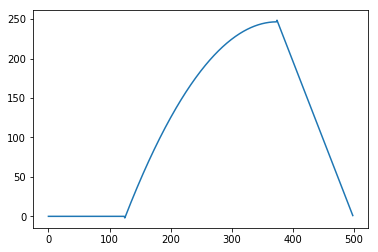

In [12]:
plt.plot(out_z[251:750])

(-2, 2)

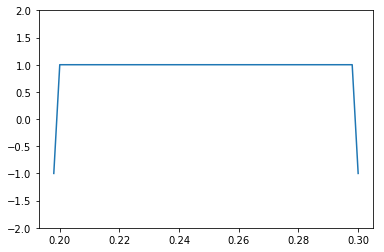

In [14]:
t = np.linspace(0.0, 1.0, 500, endpoint=False)
t1 = t[99:151]
sig3 = signal.square(2 * np.pi * 5 * t1)
plt.plot(t1,sig3)
plt.ylim(-2, 2)

(-2, 2.0)

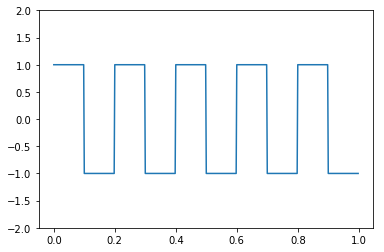

In [15]:
sig1 = signal.square(2 * np.pi * 5 * t)
c = convolution(sig1,sig3)

t2 = np.linspace(0, 1.0, 551, endpoint=False)

plt.plot(t,sig1)
plt.ylim(-2, 2.0)

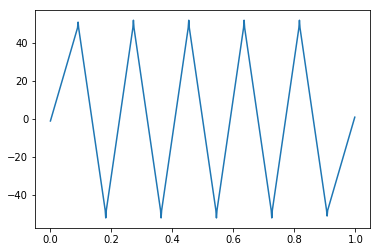

In [16]:
plt.plot(t2,c)

In [19]:
sigN = sig1+np.random.normal(0,2,500)

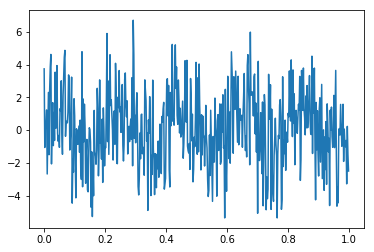

In [20]:
plt.plot(t,sigN)

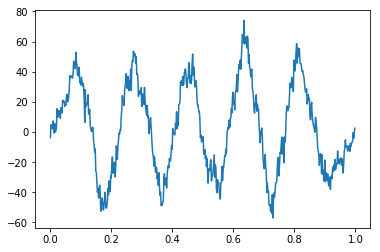

In [21]:
c = convolution(sigN,sig3)

t2 = np.linspace(0, 1.0, 551, endpoint=False)

plt.plot(t2,c)

/usr/local/lib/python2.7/dist-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


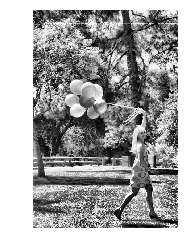


 First 5 columns and rows of the image_sharpen matrix: 
[[342.3853 250.4928 364.3638 251.3011 370.0185]
 [176.1616 156.3653 237.6028 127.4606 104.3126]
 [ 59.6414 -18.9612  28.9955 116.4091 116.5573]
 [ 42.1071  14.8732  -1.0415   0.5866 -24.5402]
 [ 32.2245  50.856   63.8596  33.875   -8.5672]]


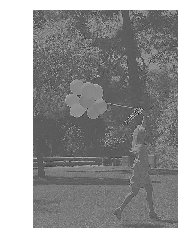

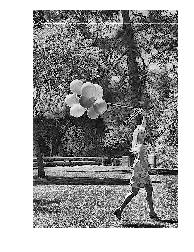

In [22]:
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
import pylab

def convolve2d(image, kernel):
    # This function which takes an image and a kernel 
    # and returns the convolution of them
    # Args:
    #   image: a numpy array of size [image_height, image_width].
    #   kernel: a numpy array of size [kernel_height, kernel_width].
    # Returns:
    #   a numpy array of size [image_height, image_width] (convolution output).
    
    kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x]=(kernel*image_padded[y:y+3,x:x+3]).sum()        
    return output

img = io.imread('/root/Data/15966_1.jpg')    # Load the image
img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)

# Adjust the contrast of the image by applying Histogram Equalization 
image_equalized = exposure.equalize_adapthist(img/np.max(np.abs(img)), clip_limit=0.03)
plt.imshow(image_equalized, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

# Convolve the sharpen kernel and the image
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
image_sharpen = convolve2d(img,kernel)
print '\n First 5 columns and rows of the image_sharpen matrix: \n', image_sharpen[:5,:5]*255

# Plot the filtered image
plt.imshow(image_sharpen, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

# Adjust the contrast of the filtered image by applying Histogram Equalization 
image_sharpen_equalized = exposure.equalize_adapthist(image_sharpen/np.max(np.abs(image_sharpen)), clip_limit=0.03)
plt.imshow(image_sharpen_equalized, cmap=plt.cm.gray)
plt.axis('off')
plt.show()